# Punto 11
Determinar el Texto Plano y la Llave del Texto Cifrado que se Muestra a Continuación:

$$ GBSXUCGSZQGKGSQPKQKGLSKASPCGBGBKGUKGCEUKUZKGGBSQEICA $$
$$ CGKGCEUERWKLKUPKQQGCIICUAEUVSHQKGCEUPCGBCGQOEVSHUNSU $$
$$ GKUZCGQSNLSHEHIEEDCUOGEPKHZGBSNKCUGSUKUASERLSKASCUGB $$
$$ SLKACRCACUZSSZEUSBEXHKRGSHWKLKUSQSKCHQTXKZHEUQBKZAEN $$
$$ NSUASZFENFCUOCUEKBXGBSWKLKUSQSKNFKQQKZEHGEGBSXUCGSZQ $$
$$ GKGSQKUZBCQAEIISKOXSZSICVSHSZGEGBSQSAHSGKHMERQGKGSKR $$
$$ EHNKIHSLIMGEKHSASUGKNSHCAKUNSQQKOSPBCISGBCQHSLIMQGKG $$
$$ SZGBKGCGQSSNSZXQSISQQGEAEUGCUXSGBSSJCQGCUOZCLIENKGCA $$
$$ USOEGCKGCEUQCGAEUGKCUSZUEGBHSKGEHBCUGERPKHEHKHNSZKGGKAD $$

*Pista:* El mensaje fue encriptado con un cifrador de sustitución simple.

Podemos solucionarlo mediante análisis de frecuencias

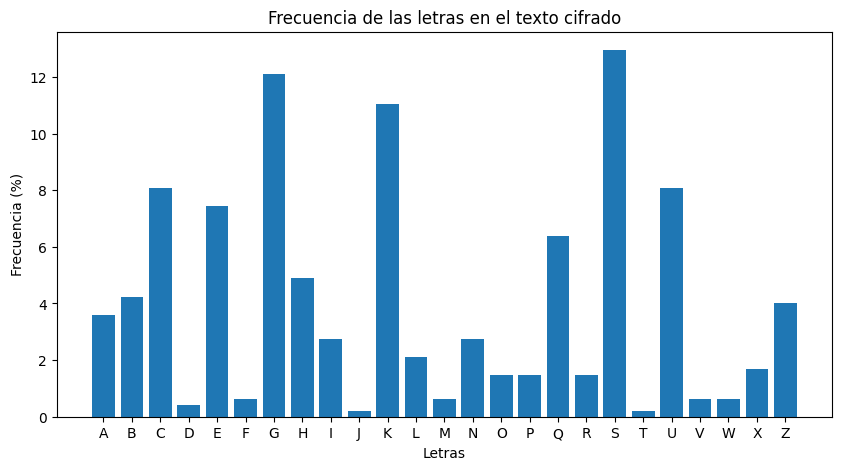

In [1]:
import matplotlib.pyplot as plt
from collections import Counter

# Definimos el texto cifrado
texto_cifrado = 'GBSXUCGSZQGKGSQPKQKGLSKASPCGBGBKGUKGCEUKUZKGGBSQEICACGKGCEUERWKLKUPKQQGCIICUAEUVSHQKGCEUPCGBCGQOEVSHUNSUGKUZCGQSNLSHEHIEEDCUOGEPKHZGBSNKCUGSUKUASERLSKASCUGBSLKACRCACUZSSZEUSBEXHKRGSHWKLKUSQSKCHQTXKZHEUQBKZAENNSUASZFENFCUOCUEKBXGBSWKLKUSQSKNFKQQKZEHGEGBSXUCGSZQGKGSQKUZBCQAEIISKOXSZSICVSHSZGEGBSQSAHSGKHMERQGKGSKREHNKIHSLIMGEKHSASUGKNSHCAKUNSQQKOSPBCISGBCQHSLIMQGKGSZGBKGCGQSSNSZXQSISQQGEAEUGCUXSGBSSJCQGCUOZCLIENKGCAUSOEGCKGCEUQCGAEUGKCUSZUEGBHSKGEHBCUGERPKHEHKHNSZKGGKAD'

# Definir la frecuencia de las letras en el idioma inglés
frecuencias_ingles = {
    'A': 8.000395, 'B': 1.535701, 'C': 2.575785, 'D': 4.317924, 'E': 12.575645,
    'F': 2.350463, 'G': 1.982677, 'H': 6.236609, 'I': 6.920007, 'J': 0.145188,
    'K': 0.739906, 'L': 4.057231, 'M': 2.560994, 'N': 6.903785, 'O': 7.591270,
    'P': 1.795742, 'Q': 0.117571, 'R': 5.959034, 'S': 6.340880, 'T': 9.085226,
    'U': 2.841783, 'V': 0.981717, 'W': 2.224893, 'X': 0.179556, 'Y': 1.900888,
    'Z': 0.079130
}

# Definir una función para calcular la frecuencia de los n-gramas
def contar_ngramas(texto, n):
    ngramas = [texto[i:i+n] for i in range(len(texto) - n + 1)]
    ngramas_frecuencia = Counter(ngramas)
    return ngramas_frecuencia

# Hallar las frecuencias de las letras
frecuencias_letras = contar_ngramas(texto_cifrado, 1)

# Calcular la frecuencia de las letras en el texto cifrado
frecuencias_letras = dict(sorted(frecuencias_letras.items()))
frecuencias_letras = {k: v / len(texto_cifrado) * 100 for k, v in frecuencias_letras.items()}
frecuencias_letras = dict(sorted(frecuencias_letras.items()))

# Plotear las frecuencias de las letras en el texto cifrado
plt.figure(figsize=(10, 5))
plt.bar(frecuencias_letras.keys(), frecuencias_letras.values())
plt.xlabel('Letras')
plt.ylabel('Frecuencia (%)')
plt.title('Frecuencia de las letras en el texto cifrado')
plt.show()

Ya tenemos las frecuencias de las letras en nuestro texto. Ahora, vamos a compararlas con las frecuencias de las letras en el idioma inglés.

In [2]:
# Definir función que imprima en orden descendente n frecuencias del texto cifrado y del idioma inglés
def imprimir_frecuencias(frecuencias_texto, frecuencias_idioma, n):
    # Ordenar las frecuencias del texto cifrado
    frecuencias_texto = sorted(frecuencias_texto.items(), key=lambda item: item[1], reverse=True)[:n]
    # Ordenar las frecuencias del idioma inglés
    frecuencias_idioma = sorted(frecuencias_idioma.items(), key=lambda item: item[1], reverse=True)[:n]

    print(f"{'Texto Cifrado':<15} {'Frecuencia (%)':<25} {'Idioma':<15} {'Frecuencia (%)'}")
    print('-' * 75)

    for i in range(min(n, len(frecuencias_texto), len(frecuencias_idioma))):
        textocrifrado, textocifrado_frec = frecuencias_texto[i]
        textoingles, textoingles_frec = frecuencias_idioma[i]

        print(f"{textocrifrado:<15} {textocifrado_frec:<25.2f} {textoingles:<15} {textoingles_frec}")


# Imprimir las frecuencias de las letras en el texto cifrado y en el idioma inglés
imprimir_frecuencias(frecuencias_letras, frecuencias_ingles, 26)

Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
S               12.95                     E               12.575645
G               12.10                     T               9.085226
K               11.04                     A               8.000395
C               8.07                      O               7.59127
U               8.07                      I               6.920007
E               7.43                      N               6.903785
Q               6.37                      S               6.34088
H               4.88                      H               6.236609
B               4.25                      R               5.959034
Z               4.03                      D               4.317924
A               3.61                      L               4.057231
I               2.76                      U               2.841783
N               2.76                      C     

Ahora realicemos el análisis con los bigramas, trigramas y cuatrigramas.

In [3]:
# Hallar las frecuencias de los bigramas
bigrams_ingles = {
    'TH': 3.882543, 'HE': 3.681391, 'IN': 2.283899, 'ER': 2.178042, 'AN': 2.140460,
    'RE': 1.749394, 'ND': 1.571977, 'ON': 1.418244, 'EN': 1.383239, 'AT': 1.335523,
    'OU': 1.285484, 'ED': 1.275779, 'HA': 1.274742, 'TO': 1.169655, 'OR': 1.151094,
    'IT': 1.134891, 'IS': 1.109877, 'HI': 1.092302, 'ES': 1.092301, 'NG': 1.053385
}

texto_cifrado_bigrams = contar_ngramas(texto_cifrado, 2)

# Calcular la frecuencia de los bigramas en el texto cifrado
texto_cifrado_bigrams = dict(sorted(texto_cifrado_bigrams.items()))
texto_cifrado_bigrams = {k: v / len(texto_cifrado) * 100 for k, v in texto_cifrado_bigrams.items()}
texto_cifrado_bigrams = dict(sorted(texto_cifrado_bigrams.items()))

# Imprimir las frecuencias de los bigramas en el texto cifrado y en el idioma inglés
imprimir_frecuencias(texto_cifrado_bigrams, bigrams_ingles, 15)

Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
KG              3.18                      TH              3.882543
GB              2.97                      HE              3.681391
CU              2.34                      IN              2.283899
GC              2.12                      ER              2.178042
GK              2.12                      AN              2.14046
SZ              2.12                      RE              1.749394
CG              1.91                      ND              1.571977
EU              1.91                      ON              1.418244
BS              1.70                      EN              1.383239
GS              1.70                      AT              1.335523
KU              1.70                      OU              1.285484
SQ              1.70                      ED              1.275779
GE              1.49                      HA    

In [4]:
# Hallar las frecuencias de los trigramas
trigramas_ingles = {
    'THE': 3.508232,
    'AND': 1.593878,
    'ING': 1.147042,
    'HER': 0.822444,
    'HAT': 0.650715,
    'HIS': 0.596748,
    'THA': 0.593593,
    'ERE': 0.560594,
    'FOR': 0.555372,
    'ENT': 0.530771,
    'ION': 0.506454,
    'TER': 0.461099,
    'WAS': 0.460487,
    'YOU': 0.437213,
    'ITH': 0.431250,
    'VER': 0.430732,
    'ALL': 0.422758,
    'WIT': 0.397290,
    'THI': 0.394796,
    'TIO': 0.378058
}

texto_cifrado_trigrams = contar_ngramas(texto_cifrado, 3)

# Calcular la frecuencia de los trigramas en el texto cifrado
texto_cifrado_trigrams = dict(sorted(texto_cifrado_trigrams.items()))
texto_cifrado_trigrams = {k: v / len(texto_cifrado) * 100 for k, v in texto_cifrado_trigrams.items()}
texto_cifrado_trigrams = dict(sorted(texto_cifrado_trigrams.items()))

# Imprimir las frecuencias de los trigramas en el texto cifrado y en el idioma inglés
imprimir_frecuencias(texto_cifrado_trigrams, trigramas_ingles, 20)


Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
GBS             1.70                      THE             3.508232
KGC             1.27                      AND             1.593878
GKG             1.06                      ING             1.147042
CEU             0.85                      HER             0.822444
GCE             0.85                      HAT             0.650715
KGS             0.85                      HIS             0.596748
QGK             0.85                      THA             0.593593
AEU             0.64                      ERE             0.560594
CGQ             0.64                      FOR             0.555372
CUG             0.64                      ENT             0.530771
CUO             0.64                      ION             0.506454
EGB             0.64                      TER             0.461099
GSZ             0.64                      WAS  

In [5]:
# Hallar las frecuencias de los cuatrigramas
cuatrigramas_ingles = {
    "THAT": 0.761242,
    "THER": 0.604501,
    "WITH": 0.573866,
    "TION": 0.551919,
    "HERE": 0.374549,
    "OULD": 0.369920,
    "IGHT": 0.309440,
    "HAVE": 0.290544,
    "HICH": 0.284292,
    "WHIC": 0.283826,
    "THIS": 0.276333,
    "THIN": 0.270413,
    "THEY": 0.262421,
    "ATIO": 0.262386,
    "EVER": 0.260695,
    "FROM": 0.258580,
    "OUGH": 0.253447,
    "WERE": 0.231089,
    "HING": 0.229944
}

# Contar los cuatrigramas en el texto cifrado
texto_cifrado_cuatrigrams = contar_ngramas(texto_cifrado, 4)

# Calcular la frecuencia de los cuatrigramas en el texto cifrado
texto_cifrado_cuatrigrams = dict(sorted(texto_cifrado_cuatrigrams.items()))
texto_cifrado_cuatrigrams = {k: v / len(texto_cifrado) * 100 for k, v in texto_cifrado_cuatrigrams.items()}
texto_cifrado_cuatrigrams = dict(sorted(texto_cifrado_cuatrigrams.items()))

# Imprimir las frecuencias de los cuatrigramas en el texto cifrado y en el idioma inglés
imprimir_frecuencias(texto_cifrado_cuatrigrams, cuatrigramas_ingles, 20)

Texto Cifrado   Frecuencia (%)            Idioma          Frecuencia (%)
---------------------------------------------------------------------------
GCEU            0.85                      THAT            0.761242
GKGS            0.85                      THER            0.604501
KGCE            0.85                      WITH            0.573866
QGKG            0.85                      TION            0.551919
KLKU            0.64                      HERE            0.374549
WKLK            0.64                      OULD            0.36992
AEUG            0.42                      IGHT            0.30944
BSXU            0.42                      HAVE            0.290544
CGQS            0.42                      HICH            0.284292
CGSZ            0.42                      WHIC            0.283826
EGBS            0.42                      THIS            0.276333
GBKG            0.42                      THIN            0.270413
GBSQ            0.42                      THEY   

En un análisis primario, podemos deducir que $GBS \rightarrow the$

In [8]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

the...te..t.te.....t.e..e..thth.t..t.......tthe......t.t..............t.........e...t.....th.t....e...e.t....t.e..e..........t.....the....te....e...e..e..the..........ee...eh.....te......e.e............h......e..e............h.the.....e.e..........t.the...te..t.te....h......e...e.e...e.e.t.the.e..et......t.te........e...t...e.e.t..e......e....e.h..eth...e....t.te.th.t.t.ee.e...e.e..t....t...ethee...t..........t...e..t..t.....t...t...e...th.e.t..h..t..........e..tt...


Por los cuatrigramas, podemos suponer que $GBKG \rightarrow that$

In [9]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

the...te..tate..a.at.ea.e..ththat.at...a..atthe......tat......a.a..a..t.........e..at.....th.t....e...e.ta...t.e..e..........t..a..the.a..te.a..e...ea.e..the.a........ee...eh...a.te..a.a.e.ea.....a.....ha.....e..e...........ah.the.a.a.e.ea..a..a...t.the...te..tate.a..h......ea..e.e...e.e.t.the.e..eta.....tatea....a..e...t.a.e.e.ta.e...a..e..a.e.h..eth...e....tate.that.t.ee.e...e.e..t....t...ethee...t.........at...e..t.at.....t...ta..e...th.eat..h..t...a...a..e.atta..


De los cuatrigramas y los monogramas, podemos inferir que $C \rightarrow i$ y $E \rightarrow o$

In [10]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

the..ite..tate..a.at.ea.e.iththat.atio.a..atthe.o.i.itatio.o..a.a..a..ti..i..o..e..atio..ithit..o.e...e.ta..it.e..e.o..oo.i..to.a..the.ai.te.a..eo..ea.ei.the.a.i.i.i..ee.o.eho..a.te..a.a.e.eai....a..o..ha..o..e..e..o..i..i.oah.the.a.a.e.ea..a..a.o.tothe..ite..tate.a..hi..o..ea..e.e.i.e.e.tothe.e..eta..o..tatea.o..a..e...toa.e.e.ta.e.i.a..e..a.e.hi.ethi..e....tate.thatit.ee.e...e.e..to.o.ti..ethee.i.ti...i..o.ati..e.otiatio..it.o.tai.e..oth.eato.hi.to..a.o.a..e.atta..


De los bigramas, supongamos que $U \rightarrow n$

In [11]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o',
    'U': 'n'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

the.nite..tate..a.at.ea.e.iththatnationan.atthe.o.i.itationo..a.an.a..ti..in.on.e..ation.ithit..o.e.n.entan.it.e..e.o..oo.in.to.a..the.aintenan.eo..ea.einthe.a.i.i.in.ee.oneho..a.te..a.ane.eai....a..on.ha..o..en.e..o..in.inoah.the.a.ane.ea..a..a.o.tothe.nite..tate.an.hi..o..ea..e.e.i.e.e.tothe.e..eta..o..tatea.o..a..e...toa.e.enta.e.i.an.e..a.e.hi.ethi..e....tate.thatit.ee.e...e.e..to.ontin.ethee.i.tin..i..o.ati.ne.otiation.it.ontaine.noth.eato.hinto..a.o.a..e.atta..


Por monogramas, supongamos que $Q \rightarrow s$

In [12]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o',
    'U': 'n',
    'Q': 's'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

the.nite.states.asat.ea.e.iththatnationan.attheso.i.itationo..a.an.assti..in.on.e.sation.ithits.o.e.n.entan.itse..e.o..oo.in.to.a..the.aintenan.eo..ea.einthe.a.i.i.in.ee.oneho..a.te..a.aneseai.s..a..onsha..o..en.e..o..in.inoah.the.a.anesea..assa.o.tothe.nite.statesan.his.o..ea..e.e.i.e.e.tothese..eta..o.statea.o..a..e...toa.e.enta.e.i.an.essa.e.hi.ethis.e...state.thatitsee.e..se.essto.ontin.ethee.istin..i..o.ati.ne.otiationsit.ontaine.noth.eato.hinto..a.o.a..e.atta..


Podemos suponer que la primer frase es "the united states", por lo que $X \rightarrow u$ y $Z \rightarrow d$

In [13]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o',
    'U': 'n',
    'Q': 's',
    'X': 'u',
    'Z': 'd'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

theunitedstates.asat.ea.e.iththatnationandattheso.i.itationo..a.an.assti..in.on.e.sation.ithits.o.e.n.entanditse..e.o..oo.in.to.a.dthe.aintenan.eo..ea.einthe.a.i.i.indeedonehou.a.te..a.aneseai.s.uad.onshad.o..en.ed.o..in.inoahuthe.a.anesea..assado.totheunitedstatesandhis.o..ea.uede.i.e.edtothese..eta..o.statea.o..a..e...toa.e.enta.e.i.an.essa.e.hi.ethis.e...statedthatitsee.eduse.essto.ontinuethee.istin.di..o.ati.ne.otiationsit.ontainednoth.eato.hinto..a.o.a..edatta..


Podemos ver al final del texto, la frase "negotiations it contained no", por lo que $A \rightarrow c$ y $O \rightarrow g$

In [14]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o',
    'U': 'n',
    'Q': 's',
    'X': 'u',
    'Z': 'd',
    'A': 'c',
    'O': 'g'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

theunitedstates.asat.eace.iththatnationandattheso.icitationo..a.an.assti..incon.e.sation.ithitsgo.e.n.entanditse..e.o..oo.ingto.a.dthe.aintenanceo..eaceinthe.aci.icindeedonehou.a.te..a.aneseai.s.uad.onshadco..enced.o..inginoahuthe.a.anesea..assado.totheunitedstatesandhisco..eaguede.i.e.edtothesec.eta..o.statea.o..a..e...toa.ecenta.e.ican.essage.hi.ethis.e...statedthatitsee.eduse.esstocontinuethee.istingdi..o.aticnegotiationsitcontainednoth.eato.hinto..a.o.a..edattac.


Podemos suponer que la última palabra es "attack", por lo que $D \rightarrow k$

In [15]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o',
    'U': 'n',
    'Q': 's',
    'X': 'u',
    'Z': 'd',
    'A': 'c',
    'O': 'g',
    'D': 'k'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

theunitedstates.asat.eace.iththatnationandattheso.icitationo..a.an.assti..incon.e.sation.ithitsgo.e.n.entanditse..e.o..ookingto.a.dthe.aintenanceo..eaceinthe.aci.icindeedonehou.a.te..a.aneseai.s.uad.onshadco..enced.o..inginoahuthe.a.anesea..assado.totheunitedstatesandhisco..eaguede.i.e.edtothesec.eta..o.statea.o..a..e...toa.ecenta.e.ican.essage.hi.ethis.e...statedthatitsee.eduse.esstocontinuethee.istingdi..o.aticnegotiationsitcontainednoth.eato.hinto..a.o.a..edattack


Podemos suponer la frase "continue the existing diplomatic", por simple contexto. Por lo que, $L \rightarrow p$, $I \rightarrow l$, $N \rightarrow m$ y $J \rightarrow x$

In [29]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o',
    'U': 'n',
    'Q': 's',
    'X': 'u',
    'Z': 'd',
    'A': 'c',
    'O': 'g',
    'D': 'k',
    'L': 'p',
    'I': 'l',
    'N': 'm',
    'J': 'x'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

theunitedstates.asatpeace.iththatnationandatthesolicitationo..apan.asstillincon.e.sation.ithitsgo.e.nmentanditsempe.o.lookingto.a.dthemaintenanceo.peaceinthepaci.icindeedonehou.a.te..apaneseai.s.uad.onshadcommenced.om.inginoahuthe.apaneseam.assado.totheunitedstatesandhiscolleaguedeli.e.edtothesec.eta..o.statea.o.mal.epl.toa.ecentame.icanmessage.hilethis.epl.statedthatitseemeduselesstocontinuetheexistingdiplomaticnegotiationsitcontainednoth.eato.hinto..a.o.a.medattack


Hay una frase "peace with", por lo que $P \rightarrow w$

In [30]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o',
    'U': 'n',
    'Q': 's',
    'X': 'u',
    'Z': 'd',
    'A': 'c',
    'O': 'g',
    'D': 'k',
    'L': 'p',
    'I': 'l',
    'N': 'm',
    'J': 'x',
    'P': 'w'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

theunitedstateswasatpeacewiththatnationandatthesolicitationo..apanwasstillincon.e.sationwithitsgo.e.nmentanditsempe.o.lookingtowa.dthemaintenanceo.peaceinthepaci.icindeedonehou.a.te..apaneseai.s.uad.onshadcommenced.om.inginoahuthe.apaneseam.assado.totheunitedstatesandhiscolleaguedeli.e.edtothesec.eta..o.statea.o.mal.epl.toa.ecentame.icanmessagewhilethis.epl.statedthatitseemeduselesstocontinuetheexistingdiplomaticnegotiationsitcontainednoth.eato.hinto.wa.o.a.medattack


Por monogramas, debería ir $H \rightarrow r$

In [31]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o',
    'U': 'n',
    'Q': 's',
    'X': 'u',
    'Z': 'd',
    'A': 'c',
    'O': 'g',
    'D': 'k',
    'L': 'p',
    'I': 'l',
    'N': 'm',
    'J': 'x',
    'P': 'w',
    'H': 'r'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

theunitedstateswasatpeacewiththatnationandatthesolicitationo..apanwasstillincon.ersationwithitsgo.ernmentanditsemperorlookingtowardthemaintenanceo.peaceinthepaci.icindeedonehoura.ter.apaneseairs.uadronshadcommenced.om.inginoahuthe.apaneseam.assadortotheunitedstatesandhiscolleaguedeli.eredtothesecretar.o.statea.ormalrepl.toarecentamericanmessagewhilethisrepl.statedthatitseemeduselesstocontinuetheexistingdiplomaticnegotiationsitcontainednothreatorhinto.warorarmedattack


La frase "still in conversation" nos dice que $V \rightarrow v$

In [32]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o',
    'U': 'n',
    'Q': 's',
    'X': 'u',
    'Z': 'd',
    'A': 'c',
    'O': 'g',
    'D': 'k',
    'L': 'p',
    'I': 'l',
    'N': 'm',
    'J': 'x',
    'P': 'w',
    'H': 'r',
    'V': 'v'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

theunitedstateswasatpeacewiththatnationandatthesolicitationo..apanwasstillinconversationwithitsgovernmentanditsemperorlookingtowardthemaintenanceo.peaceinthepaci.icindeedonehoura.ter.apaneseairs.uadronshadcommenced.om.inginoahuthe.apaneseam.assadortotheunitedstatesandhiscolleaguedeliveredtothesecretar.o.statea.ormalrepl.toarecentamericanmessagewhilethisrepl.statedthatitseemeduselesstocontinuetheexistingdiplomaticnegotiationsitcontainednothreatorhinto.warorarmedattack


Frase "this reply" nos dice que $M \rightarrow y$

In [33]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o',
    'U': 'n',
    'Q': 's',
    'X': 'u',
    'Z': 'd',
    'A': 'c',
    'O': 'g',
    'D': 'k',
    'L': 'p',
    'I': 'l',
    'N': 'm',
    'J': 'x',
    'P': 'w',
    'H': 'r',
    'V': 'v',
    'M': 'y'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

theunitedstateswasatpeacewiththatnationandatthesolicitationo..apanwasstillinconversationwithitsgovernmentanditsemperorlookingtowardthemaintenanceo.peaceinthepaci.icindeedonehoura.ter.apaneseairs.uadronshadcommenced.om.inginoahuthe.apaneseam.assadortotheunitedstatesandhiscolleaguedeliveredtothesecretaryo.statea.ormalreplytoarecentamericanmessagewhilethisreplystatedthatitseemeduselesstocontinuetheexistingdiplomaticnegotiationsitcontainednothreatorhinto.warorarmedattack


Conector "of" nos dice que $F \rightarrow f$

In [34]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o',
    'U': 'n',
    'Q': 's',
    'X': 'u',
    'Z': 'd',
    'A': 'c',
    'O': 'g',
    'D': 'k',
    'L': 'p',
    'I': 'l',
    'N': 'm',
    'J': 'x',
    'P': 'w',
    'H': 'r',
    'V': 'v',
    'M': 'y',
    'R': 'f'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

theunitedstateswasatpeacewiththatnationandatthesolicitationof.apanwasstillinconversationwithitsgovernmentanditsemperorlookingtowardthemaintenanceofpeaceinthepacificindeedonehourafter.apaneseairs.uadronshadcommenced.om.inginoahuthe.apaneseam.assadortotheunitedstatesandhiscolleaguedeliveredtothesecretaryofstateaformalreplytoarecentamericanmessagewhilethisreplystatedthatitseemeduselesstocontinuetheexistingdiplomaticnegotiationsitcontainednothreatorhintofwarorarmedattack


Hay un país que se repite en el mensaje, "japan", por lo que $W \rightarrow p$

In [35]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o',
    'U': 'n',
    'Q': 's',
    'X': 'u',
    'Z': 'd',
    'A': 'c',
    'O': 'g',
    'D': 'k',
    'L': 'p',
    'I': 'l',
    'N': 'm',
    'J': 'x',
    'P': 'w',
    'H': 'r',
    'V': 'v',
    'M': 'y',
    'R': 'f',
    'W': 'j'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

theunitedstateswasatpeacewiththatnationandatthesolicitationofjapanwasstillinconversationwithitsgovernmentanditsemperorlookingtowardthemaintenanceofpeaceinthepacificindeedonehourafterjapaneseairs.uadronshadcommenced.om.inginoahuthejapaneseam.assadortotheunitedstatesandhiscolleaguedeliveredtothesecretaryofstateaformalreplytoarecentamericanmessagewhilethisreplystatedthatitseemeduselesstocontinuetheexistingdiplomaticnegotiationsitcontainednothreatorhintofwarorarmedattack


Palabras "bombing", "ambassador" y "squadrons" finalizan nuestra desencripción, diciendonos que $F \rightarrow b$, $T \rightarrow q$

In [36]:
# Definir un diccionario con las letras reemplazadas
reemplazos = {
    'G': 't',
    'B': 'h',
    'S': 'e',
    'K': 'a',
    'C': 'i',
    'E': 'o',
    'U': 'n',
    'Q': 's',
    'X': 'u',
    'Z': 'd',
    'A': 'c',
    'O': 'g',
    'D': 'k',
    'L': 'p',
    'I': 'l',
    'N': 'm',
    'J': 'x',
    'P': 'w',
    'H': 'r',
    'V': 'v',
    'M': 'y',
    'R': 'f',
    'W': 'j',
    'F': 'b',
    'T': 'q'
}

# Reemplazar las letras en el texto cifrado
texto_cifrado_reemplazado = ''.join([reemplazos[letra] if letra in reemplazos else '.' for letra in texto_cifrado])

# Imprimir como se ve el texto cifrado reemplazado
print(texto_cifrado_reemplazado)

theunitedstateswasatpeacewiththatnationandatthesolicitationofjapanwasstillinconversationwithitsgovernmentanditsemperorlookingtowardthemaintenanceofpeaceinthepacificindeedonehourafterjapaneseairsquadronshadcommencedbombinginoahuthejapaneseambassadortotheunitedstatesandhiscolleaguedeliveredtothesecretaryofstateaformalreplytoarecentamericanmessagewhilethisreplystatedthatitseemeduselesstocontinuetheexistingdiplomaticnegotiationsitcontainednothreatorhintofwarorarmedattack


## Conclusión
Podemos ver que el texto plano obtenido tiene sentido, por lo que este es:

the united states was at peace with that nation and at the solicitation of japan was still in conversation with its government and its emperor looking toward the maintenance of peace in the pacific indeed one hour after japanese air squadrons had commenced bombing in oahu the japanese ambassador to the united states and his colleague delivered to the secretary of state a formal reply to are cent american message while this reply stated that it seemed useless to continue the existing diplomatic negotiations it contained no threat or hint of war or armed attack

